In [1]:
import os

os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


In [2]:
import galsim
import jax_galsim as xgalsim

import matplotlib.pyplot as plt

In [3]:
def draw_spergel_galsim(nu:float, nx:int = 71, fwhm=0.8, hlr=0.4, g1=0.0, g2=0.0):
    gal = galsim.Spergel(nu, half_light_radius=hlr, flux=1.0)
    gal = gal.shear(g1=g1, g2=g2)
    psf = galsim.Gaussian(fwhm=fwhm, flux=1.0)
    gal_conv = galsim.Convolve([gal, psf])
    img = gal_conv.drawImage(nx=nx, ny=nx, scale=0.2)
    return img.array

def draw_gaussian_galsim(nx:int = 71, fwhm=0.8, hlr=0.4, g1=0.0, g2=0.0):
    gal = galsim.Gaussian(half_light_radius=hlr, flux=1.0)
    gal = gal.shear(g1=g1, g2=g2)
    psf = galsim.Gaussian(fwhm=fwhm, flux=1.0)
    gal_conv = galsim.Convolve([gal, psf])
    img = gal_conv.drawImage(nx=nx, ny=nx, scale=0.2)
    return img.array

In [4]:
# def draw_spergel(nu:float, nx:int = 71, fwhm=0.8, hlr=1.0):
#     gal = xgalsim.Spergel(nu, half_light_radius=hlr, flux=1.0)
#     psf = xgalsim.Gaussian(fwhm=fwhm, flux=1.0)
#     gal_conv = xgalsim.Convolve([gal, psf])
#     img = gal_conv.drawImage(nx=nx, ny=nx, scale=0.2)
#     return img.array

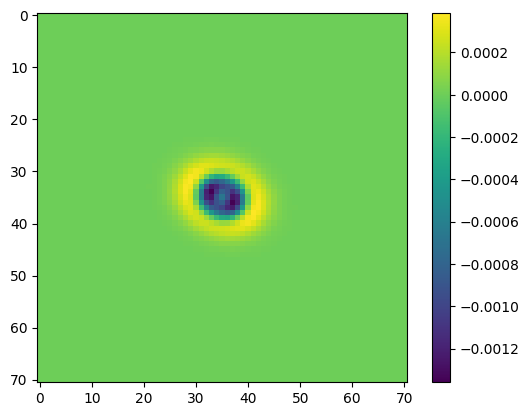

In [5]:
img = draw_spergel_galsim(0.5, g1=0.1, g2=0.1)
img2 = draw_gaussian_galsim(g1=0.1, g2=0.1)
# img2 = draw_spergel_galsim(0.3)

# plt.imshow(img)
# plt.imshow(img2)
plt.imshow(img - img2)
plt.colorbar()

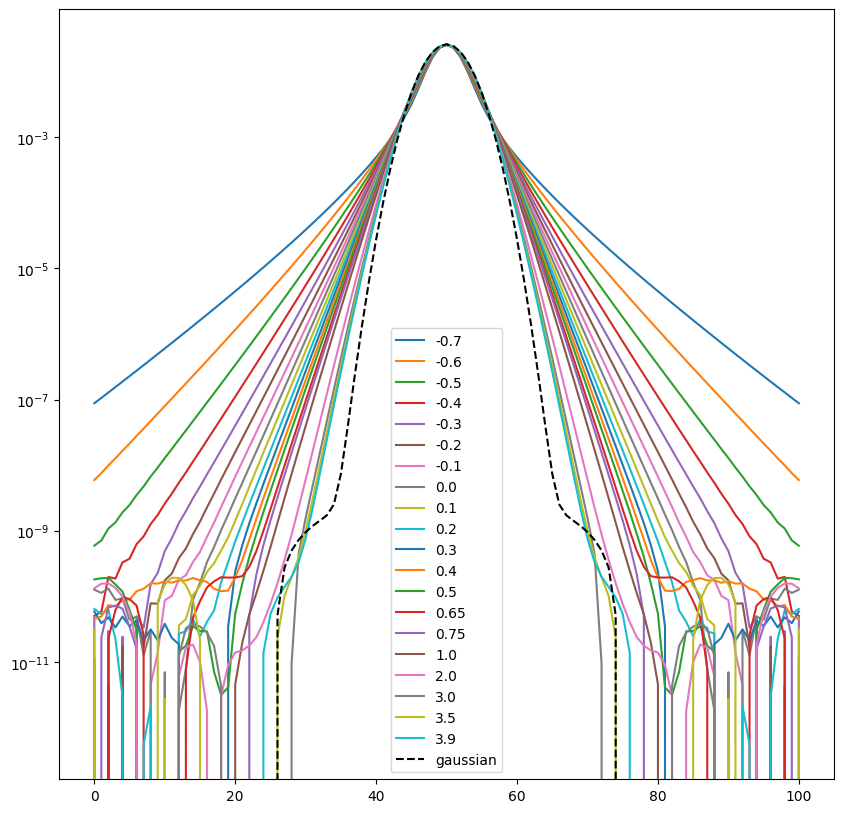

In [ ]:
# domain is -0.85 to 4, nu = 0.5 is exponential profile

g1 = 0.2
g2= 0.2
hlr=0.4

plt.figure(figsize=(10,10))
for nu in sorted([0.5, 0.65, 0.75, 1.0, 0.4, 0.3, 0.2, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, 2.0, 3.0, 3.5, 3.9 ,0.0, 0.1]):
# for nu in [ -0.6, 0.1, 0.5, 3.0]:
# for nu in [ -0.6, 0.5, 3.9]:
    img = draw_spergel_galsim(nu, nx=101, g1=g1, g2=g2, hlr=hlr)
    plt.plot(img[50], label=nu)

img = draw_gaussian_galsim(nx=101, hlr=hlr, g1=g1, g2=g2)
plt.plot(img[50], label='gaussian', c='k', ls='--')
plt.yscale('log')

plt.legend()